In [1]:
import pandas as pd

In [2]:
df_bell=pd.read_csv('safety_bell.csv', encoding='cp949')

In [3]:
df_bell.head()

,안전비상벨관리번호,설치목적,설치장소유형,설치위치,소재지도로명주소,소재지지번주소,위도,경도,연계방식,경찰연계유무,...,부가기능,안전비상벨설치년도,최종점검일자,최종점검결과구분,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 21
0,1,1,2,신채호선생생가 공원,대전광역시 중구 단재로229번길 29,대전광역시 중구 어남동 248-1,36.232430,127.410134,2,Y,...,"경보등, 경보음",2017,2019-08-07,Y,대전광역시 중구청,042-606-6292,2019-09-17,3650000,대전광역시 중구,NaN
1,2,1,2,농촌테마마을,대전광역시 중구 운남로85번길 32-8,대전광역시 중구 무수동 96-3,36.278233,127.407863,2,Y,...,"경보등, 경보음",2017,2019-08-07,Y,대전광역시 중구청,042-606-7262,2019-09-17,3650000,대전광역시 중구,NaN
2,3,1,2,으능정이고객 지원센터 건물 1층,대전광역시 중구 중교로 83,대전광역시 중구 은행동 170-31,36.327110,127.428538,2,Y,...,"경보등, 경보음",2017,2019-07-25,Y,대전광역시 중구청,042-606-7223,2019-09-17,3650000,대전광역시 중구,NaN
3,4,1,2,청소년문화마당광장내 건물1층,대전광역시 중구 선화로119번길 16-3,대전광역시 중구 선화동 139,36.331036,127.420073,2,Y,...,"경보등, 경보음",2017,2019-07-16,Y,대전광역시 중구청,042-606-7292,2019-09-17,3650000,대전광역시 중구,NaN
4,5,1,2,목척시장,대전광역시 중구 목척5길 126,대전광역시 중구 은행동 4-87,36.331112,127.424128,2,Y,...,"경보등, 경보음",2017,2019-07-16,Y,대전광역시 중구청,042-606-7305,2019-09-17,3650000,대전광역시 중구,NaN


In [4]:
df_bell.columns

Index(['안전비상벨관리번호', '설치목적', '설치장소유형', '설치위치', '소재지도로명주소', '소재지지번주소', '위도',
       '경도', '연계방식', '경찰연계유무', '경비업체연계유무', '관리사무소연계유무', '부가기능', '안전비상벨설치년도',
       '최종점검일자', '최종점검결과구분', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 21'],
      dtype='object')

In [5]:
df_bell['경찰연계유무'].value_counts()

N    21490
Y    10401
Name: 경찰연계유무, dtype: int64

In [6]:
df_bell['경비업체연계유무'].value_counts()

N    30789
Y     1102
Name: 경비업체연계유무, dtype: int64

In [7]:
result=[]
for one in df_bell['경찰연계유무']:
    if one=='Y':
        result.append(int(1))
    else:
        result.append(int(0))
df_bell['경찰연계유무구분']=result

In [8]:
result1=[]
for one in df_bell['관리사무소연계유무']:
    if one=='Y':
        result1.append(int(1))
    else:
        result1.append(int(0))
df_bell['관리사무소연계유무']=result1

In [9]:
result2=[]
for one in df_bell['최종점검결과구분']:
    if one=='Y':
        result2.append(int(1))
    else:
        result2.append(int(0))
df_bell['최종점검결과구분']=result2

In [10]:
df_bell['제공기관코드']=df_bell['제공기관코드'].replace('B551232', '2551232')

In [11]:
df_bell['안전비상벨설치년도']=df_bell['안전비상벨설치년도'].astype(float)
df_bell['제공기관코드']=df_bell['제공기관코드'].astype(int)
df_bell['설치장소유형']=df_bell['설치장소유형'].astype(int)
df_bell['설치목적']=df_bell['설치목적'].astype(int)

df1_bell: 1번째 Classification을 위한 DataFrame

In [12]:
df1_bell=df_bell[['설치목적', '안전비상벨설치년도', '제공기관코드', '경찰연계유무구분', '경찰연계유무']]

In [13]:
df1_bell.head()

,설치목적,안전비상벨설치년도,제공기관코드,경찰연계유무구분,경찰연계유무
0,1,2017.0,3650000,1,Y
1,1,2017.0,3650000,1,Y
2,1,2017.0,3650000,1,Y
3,1,2017.0,3650000,1,Y
4,1,2017.0,3650000,1,Y


In [14]:
df1_bell['설치목적'].unique()

array([ 1,  2, 99], dtype=int64)

In [15]:
df1_bell.isnull().sum()

설치목적         0
안전비상벨설치년도    0
제공기관코드       0
경찰연계유무구분     0
경찰연계유무       0
dtype: int64

In [16]:
features1=['설치목적', '안전비상벨설치년도', '제공기관코드']

In [17]:
X=df1_bell[features1]

In [18]:
y=df1_bell['경찰연계유무구분']

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [21]:
model_knn=KNeighborsClassifier(n_neighbors=3)

In [22]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
model_knn.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model_dt=DecisionTreeClassifier()

In [26]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
model_dt.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_rf=RandomForestClassifier()

In [30]:
model_rf.fit(X_train, y_train)

C:\Users\yangyoungjo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
model_rf.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
model_knn.score(X_test,y_test)

0.9790543082904803

In [33]:
model_dt.score(X_test, y_test)

0.9825661607926752

In [34]:
model_rf.score(X_test, y_test)

0.982064467578076

In [35]:
list(zip(df1_bell['경찰연계유무구분'].unique(),df1_bell['경찰연계유무'].unique()))

[(1, 'Y'), (0, 'N')]

In [36]:
lookup_con_police=dict(zip(df1_bell['경찰연계유무구분'].unique(),df1_bell['경찰연계유무'].unique()))

In [37]:
police_predict=model_dt.predict([[1, 2017, 4490000]])

In [38]:
lookup_con_police[police_predict[0]]

'Y'

In [39]:
model_knn.predict([[1, 2017, 4490000]])

array([1], dtype=int64)

In [40]:
model_dt.predict([[1, 2017, 4490000]])

array([1], dtype=int64)

In [41]:
model_dt.predict([[1, 2017, 4490000]])

array([1], dtype=int64)

In [42]:
df_bell[['안전비상벨설치년도', '경찰연계유무구분']].groupby(['안전비상벨설치년도']).mean()

,경찰연계유무구분
안전비상벨설치년도,
2004.0,0.096154
2005.0,0.197802
2006.0,0.168627
2007.0,0.067708
2008.0,0.393443
2009.0,0.435897
2010.0,0.182796
2011.0,0.291611
2012.0,0.318487


In [43]:
df_bell[['안전비상벨설치년도', '경찰연계유무구분']].groupby(['안전비상벨설치년도'],as_index=False).mean().sort_values(by='경찰연계유무구분', ascending=False)

,안전비상벨설치년도,경찰연계유무구분
21,2025.0,1.000000
20,2024.0,1.000000
19,2023.0,1.000000
18,2022.0,1.000000
17,2021.0,1.000000
16,2020.0,0.500000
5,2009.0,0.435897
12,2016.0,0.427997
4,2008.0,0.393443
13,2017.0,0.393074


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
from matplotlib import font_manager, rc
import matplotlib
font_location="C:\Windows\Fonts\malgun.ttf"
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

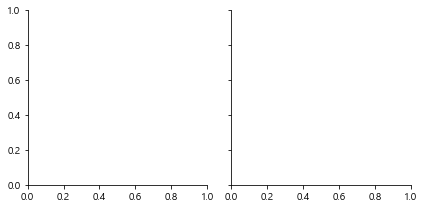

In [46]:
sns.FacetGrid(df_bell, col='경찰연계유무구분')

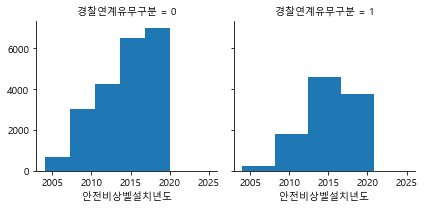

In [47]:
g = sns.FacetGrid(df1_bell, col='경찰연계유무구분')
g.map(plt.hist, '안전비상벨설치년도', bins=5)

df2_bell: 2번째 Classification을 위한 DataFrame

In [48]:
df2_bell=df_bell[['최종점검결과구분','안전비상벨설치년도', '관리사무소연계유무', '제공기관코드']]

In [49]:
df2_bell['관리사무소연계유무'].value_counts()

0    27193
1     4698
Name: 관리사무소연계유무, dtype: int64

In [50]:
df2_bell.isnull().sum()

최종점검결과구분     0
안전비상벨설치년도    0
관리사무소연계유무    0
제공기관코드       0
dtype: int64

In [51]:
features2=['안전비상벨설치년도','최종점검결과구분', '제공기관코드']

In [52]:
X1=df2_bell[features2]

In [53]:
y1=df2_bell['관리사무소연계유무']

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X1,y1)

In [55]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [56]:
model_knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
model_dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
model_rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
model_knn.score(X_test, y_test)

0.9951084911576571

In [62]:
model_dt.score(X_test, y_test)

0.9948576445503574

In [63]:
model_rf.score(X_test, y_test)

0.994481374639408

In [64]:
model_knn.predict([[2017, 1, 4490000]])

array([0], dtype=int64)

In [65]:
model_dt.predict([[2017, 1, 4490000]])

array([0], dtype=int64)

In [66]:
model_rf.predict([[2017, 1, 4490000]])

array([0], dtype=int64)

In [67]:
df_bell[['안전비상벨설치년도', '관리사무소연계유무']].groupby(['안전비상벨설치년도']).mean()

,관리사무소연계유무
안전비상벨설치년도,
2004.0,0.384615
2005.0,0.000000
2006.0,0.003922
2007.0,0.026042
2008.0,0.079625
2009.0,0.124668
2010.0,0.120968
2011.0,0.280293
2012.0,0.120168


In [68]:
df_bell[['안전비상벨설치년도', '관리사무소연계유무']].groupby(['안전비상벨설치년도'],as_index=False).mean().sort_values(by='관리사무소연계유무', ascending=False)

,안전비상벨설치년도,관리사무소연계유무
0,2004.0,0.384615
7,2011.0,0.280293
11,2015.0,0.183552
9,2013.0,0.166446
10,2014.0,0.162577
13,2017.0,0.156757
14,2018.0,0.139793
5,2009.0,0.124668
6,2010.0,0.120968
8,2012.0,0.120168


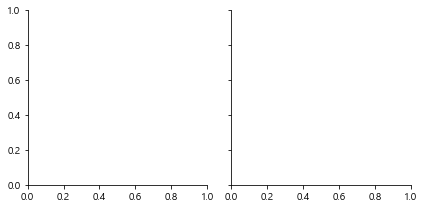

In [69]:
sns.FacetGrid(df_bell, col='관리사무소연계유무')

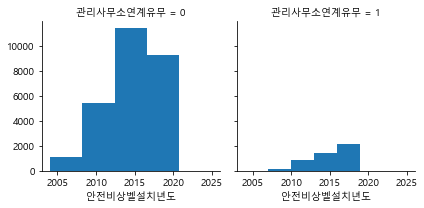

In [70]:
g = sns.FacetGrid(df2_bell, col='관리사무소연계유무')
g.map(plt.hist, '안전비상벨설치년도', bins=5)

df3_bell: 1번째 Regressor를 하기 위한 DataFrame

In [71]:
df3_bell=df_bell[['안전비상벨설치년도', '설치목적', '설치장소유형', '제공기관코드']]

In [72]:
df3_bell.isnull().sum()

안전비상벨설치년도    0
설치목적         0
설치장소유형       0
제공기관코드       0
dtype: int64

In [73]:
df3_bell['설치목적'].value_counts()

1     29079
2      2332
99      480
Name: 설치목적, dtype: int64

In [74]:
features2=['설치장소유형', '제공기관코드']

In [75]:
X2=df3_bell[features2]

In [76]:
y2=df3_bell['안전비상벨설치년도']

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X2,y2)

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
model_r_knn=KNeighborsRegressor(n_neighbors=3)

In [80]:
model_r_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [81]:
model_r_knn.predict(X_test)

array([2011.        , 2014.66666667, 2015.66666667, ..., 2016.33333333,
       2012.33333333, 2015.33333333])

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
model_r_dt=DecisionTreeRegressor()

In [84]:
model_r_dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [85]:
model_r_dt.predict(X_test)

array([2012.99805068, 2015.03846154, 2013.33663366, ..., 2016.32827324,
       2012.99835526, 2015.77272727])

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
model_r_rf=RandomForestRegressor()

In [88]:
model_r_rf.fit(X_train, y_train)

C:\Users\yangyoungjo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
model_r_rf.predict(X_test)

array([2013.00620374, 2015.01195713, 2013.34679871, ..., 2016.33516682,
       2013.03191202, 2015.68819633])

In [90]:
model_r_knn.score(X_test,y_test)

0.21134398145209932

In [91]:
model_r_dt.score(X_test,y_test)

0.36495516867560385

In [92]:
model_r_rf.score(X_test,y_test)

0.36484772468840243

In [93]:
int(model_r_knn.predict([[1, 3200000]]))

2015

In [94]:
int(model_r_dt.predict([[1, 3200000]]))

2013

In [95]:
int(model_r_rf.predict([[1, 3200000]]))

2013

In [96]:
df_cctv=pd.read_csv('cctv.csv', encoding='cp949')

In [97]:
df_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,Unnamed: 15
0,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 사무실 복도(3),30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
1,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 사무실 복도(2),30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
2,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 사무실 복도(1),30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
3,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 세미나실 내부,30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
4,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,1층 종합안내실 내부,30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN


In [98]:
result=[]
for one in df_cctv['제공기관코드']:
    one=int(one.replace('B','2'))
    result.append(one)

In [99]:
df_cctv['제공기관코드']=result

In [100]:
df_cctv['제공기관코드']=df_cctv['제공기관코드'].astype(int)

In [101]:
df_cctv.columns

Index(['관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', '카메라화소수', '촬영방면정보',
       '보관일수', '설치년월', '관리기관전화번호', '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 15'],
      dtype='object')

In [102]:
df_cctv['보관일수'].value_counts()

30.0     149944
7.0         680
20.0        505
15.0        445
0.0         399
          ...  
128.0         1
100.0         1
86.0          1
81.0          1
77.0          1
Name: 보관일수, Length: 127, dtype: int64

In [103]:
df_cctv['보관일수'].unique()

array([ 30.,  nan,  18.,  50.,  43., 114.,  15.,  90.,   0.,   7.,  14.,
        60.,  10.,   4.,  20.,  29.,  80.,   3.,  12.,  45.,  26.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        44.,  46.,  47.,  48.,  49.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132.,  28.,  25., 180.,  11.,  21.,
         8.,  17.,   2.,  23.,   6.,   5.,   1.])

df1_cctv: 2번째 Regressor를 하기 위한 DataFrame

In [104]:
df1_cctv=df_cctv[['카메라대수','보관일수','제공기관코드', '설치년월']]

In [105]:
df1_cctv.isnull().sum()

카메라대수         0
보관일수      19465
제공기관코드        0
설치년월      40201
dtype: int64

In [106]:
df1_cctv=df1_cctv.dropna()

In [107]:
def get_year(row):
    return(row.split('-')[0])

In [108]:
df1_cctv['설치년도']=df1_cctv['설치년월'].apply(get_year)

In [109]:
df1_cctv['설치년도']=df1_cctv['설치년도'].astype(float)

In [110]:
df1_cctv.head()

,카메라대수,보관일수,제공기관코드,설치년월,설치년도
0,1,30.0,2551450,2011-09,2011.0
1,1,30.0,2551450,2011-09,2011.0
2,1,30.0,2551450,2011-09,2011.0
3,1,30.0,2551450,2011-09,2011.0
4,1,30.0,2551450,2011-09,2011.0


In [111]:
features3=['카메라대수', '제공기관코드']

In [112]:
X3=df1_cctv[features3]

In [113]:
y3=df1_cctv['설치년도']

In [114]:
X_train, X_test, y_train, y_test=train_test_split(X3,y3)

In [115]:
model_r_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [116]:
model_r_knn.predict(X_test)

array([2014.66666667, 2015.66666667, 2012.33333333, ..., 2015.        ,
       2014.        , 2019.        ])

In [117]:
model_r_dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [118]:
model_r_dt.predict(X_test)

array([2015.29571281, 2015.09302326, 2012.6804878 , ..., 2014.30097087,
       2015.421875  , 2019.        ])

In [119]:
model_r_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [120]:
model_r_rf.predict(X_test)

array([2015.29801059, 2015.14770522, 2012.66050128, ..., 2014.21435914,
       2015.43967164, 2019.        ])

In [121]:
model_r_knn.score(X_test,y_test)

0.2249583032346758

In [122]:
model_r_dt.score(X_test,y_test)

0.35202560365945057

In [123]:
model_r_rf.score(X_test, y_test)

0.36377537227969603

In [124]:
int(model_r_knn.predict([[2, 4490000]]))

2015

In [125]:
int(model_r_dt.predict([[2, 4490000]]))

2015

In [126]:
int(model_r_rf.predict([[2, 4490000]]))

2015